--- Звіт по класифікації ---
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.67      0.60      0.63        10

    accuracy                           0.72        25
   macro avg       0.71      0.70      0.70        25
weighted avg       0.72      0.72      0.72        25


--- Коефіцієнти моделі ---
Коефіцієнти (ваги для x0 та x1): [[-0.18610769  0.69826989]]
Вільний член (зсув): [-1.52828253]

--- Прогноз ---
Прогноз класу для точки з координатами [3 4]: клас 1


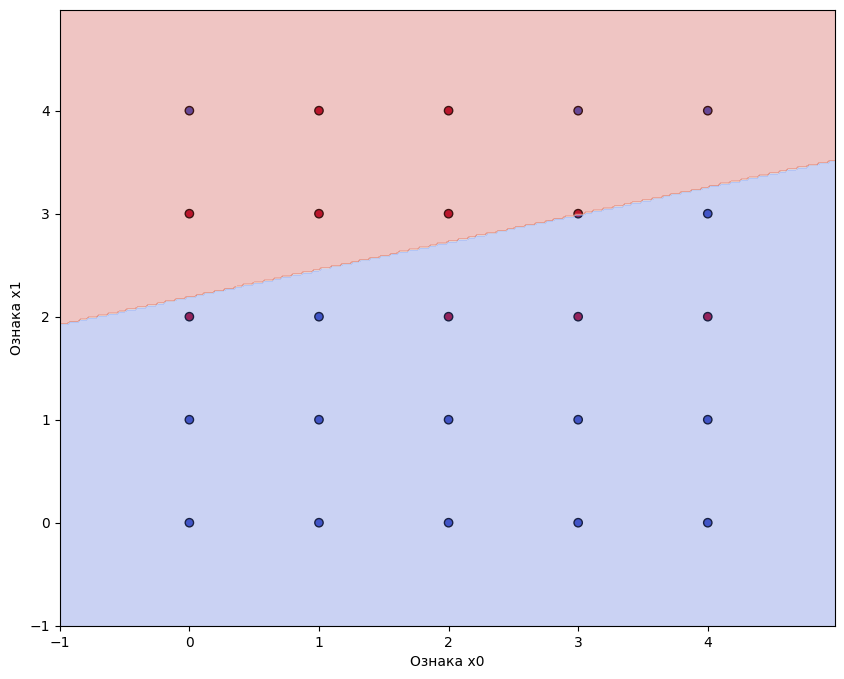

In [10]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X_features = np.array([[0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4],
                       [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4]])
y = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0 ])


X = X_features.T

classifier_model = LogisticRegression()
classifier_model.fit(X, y)

y_pred = classifier_model.predict(X)
print("--- Звіт по класифікації ---")
print(classification_report(y, y_pred))
print("\n--- Коефіцієнти моделі ---")
print(f"Коефіцієнти (ваги для x0 та x1): {classifier_model.coef_}")
print(f"Вільний член (зсув): {classifier_model.intercept_}")

new_point = np.array([[3, 4]])
predicted_class = classifier_model.predict(new_point)

print(f"\n--- Прогноз ---")
print(f"Прогноз класу для точки з координатами {new_point[0]}: клас {predicted_class[0]}")

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02),
                       np.arange(x1_min, x1_max, 0.02))
Z = classifier_model.predict(np.c_[xx0.ravel(), xx1.ravel()])
Z = Z.reshape(xx0.shape)
plt.contourf(xx0, xx1, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.xlabel('Ознака x0')
plt.ylabel('Ознака x1')

plt.show()